In [1]:
import numpy as np
import cv2
import os 
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

from sklearn import svm, metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier



In [2]:
#import Excelsheet
path = r"C:\Users\khaldoun\Desktop\final project\input\5k_diagnosis"
df = pd.read_csv(os.path.join(path, "full_df.csv"))
#df = df.head(200)
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [3]:
file_names = []
labels = []

for text, label, file_name in zip(df["Left-Diagnostic Keywords"], df["C"], df["Left-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)
        
for text, label, file_name in zip(df["Right-Diagnostic Keywords"], df["C"], df["Right-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

print(len(file_names), len(labels))


6162 6162


In [4]:
#define Image size 
ROW = 64
COL = 64

In [5]:
#load images into numpy array and resize them 
image_data = []
for idx, image_name in enumerate(file_names):
    
    img = cv2.imread(os.path.join(path,"preprocessed_images",image_name))
    try:
        img = cv2.resize(img, (ROW, COL))
        image_data.append(img)
    except:
        del labels[idx]
    
image_data = np.array(image_data)

print(image_data.shape)

(6078, 64, 64, 3)


In [6]:

#prepare training data by sampling 
temp = []
for idx, label in enumerate(labels):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in labels if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

temp = []
for idx, label in enumerate(labels):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

X_data = np.array(X_data)
y_data = np.array(y_data)


print(X_data.shape, y_data.shape)



(1178, 64, 64, 3) (1178,)


1


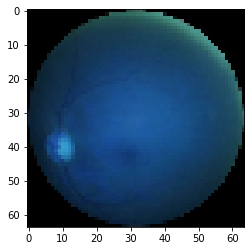

0


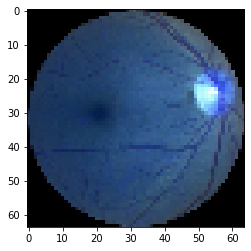

0


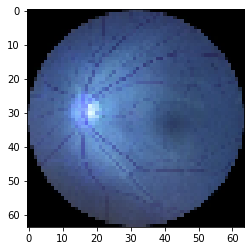

0


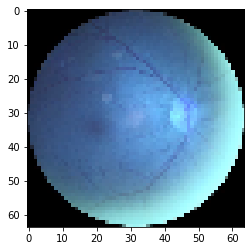

0


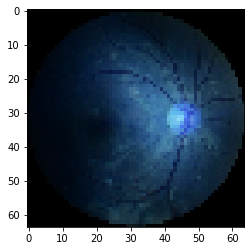

1


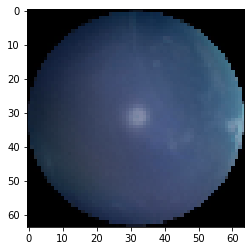

1


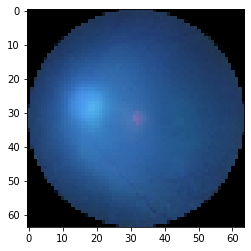

1


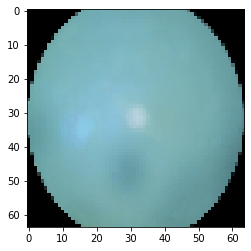

0


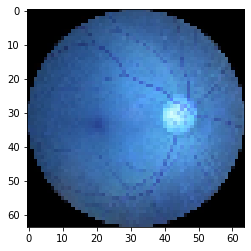

1


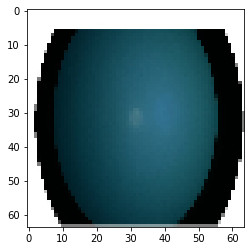

1


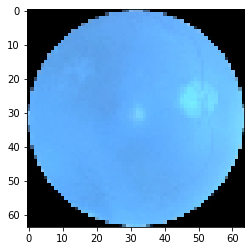

0


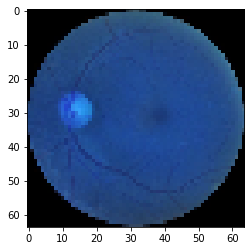

0


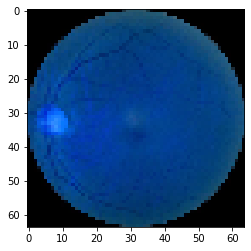

0


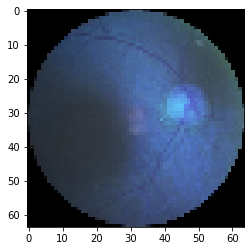

0


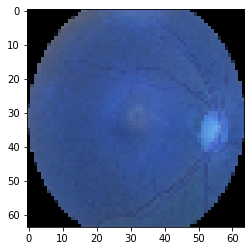

1


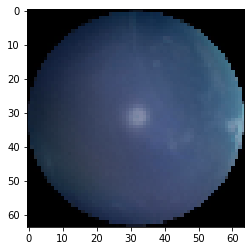

1


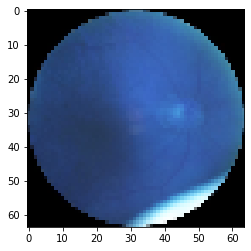

0


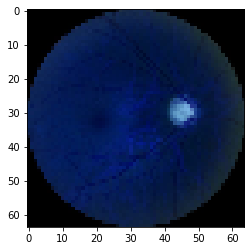

0


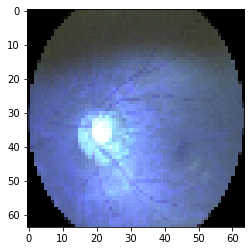

1


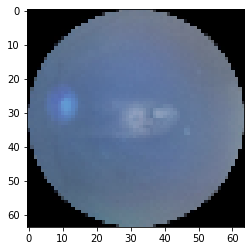

In [7]:
#display some images 
for i in range(20):
    n = random. randint(0,len(y_data))
    print(y_data[n])
    plt.imshow(X_data[n])
    plt.show()
    


#  Train CNN


In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:

X_data_CNN = (X_data / 255)
y_data

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
#split data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X_data_CNN, y_data, test_size=0.15, shuffle = True, random_state = 1)


#split train into train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.15, shuffle = True, random_state = 2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(850, 64, 64, 3) (850,)
(151, 64, 64, 3) (151,)
(177, 64, 64, 3) (177,)


In [11]:
df = pd.DataFrame(y_data)

df.value_counts()

1    589
0    589
dtype: int64

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 128)       1

In [15]:
#opt = tf.keras.optimizers.Adam(
#    learning_rate=0.0001)

opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001

model.compile(
    optimizer=opt, 
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.1,  # set range for random shear
        zoom_range=0.2,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        #validation_split=0.15
)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
valid_generator = datagen.flow(X_val, y_val, batch_size=32)

    # Fit the model on the batches generated by datagen.flow().
model.fit_generator(train_generator,
                        validation_data=valid_generator,
                        epochs=30,
			)


C:\Users\khaldoun\.conda\envs\khaldoun1\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
27/27 [==============================] - 13s 486ms/step - loss: 0.6702 - accuracy: 0.6576 - val_loss: 0.5586 - val_accuracy: 0.7947
Epoch 2/30
27/27 [==============================] - 13s 488ms/step - loss: 0.5972 - accuracy: 0.7224 - val_loss: 0.4971 - val_accuracy: 0.8344
Epoch 3/30
27/27 [==============================] - 13s 490ms/step - loss: 0.5523 - accuracy: 0.7447 - val_loss: 0.4605 - val_accuracy: 0.7881
Epoch 4/30
27/27 [==============================] - 13s 501ms/step - loss: 0.5183 - accuracy: 0.7659 - val_loss: 0.5418 - val_accuracy: 0.8609
Epoch 5/30
27/27 [==============================] - 13s 491ms/step - loss: 0.4966 - accuracy: 0.7706 - val_loss: 0.5260 - val_accuracy: 0.8013
Epoch 6/30
27/27 [==============================] - 13s 488ms/step - loss: 0.5796 - accuracy: 0.7706 - val_loss: 0.3915 - val_accuracy: 0.8609
Epoch 7/30
27/27 [==============================] - 13s 486ms/step - loss: 0.5802 - accuracy: 0.7635 - val_loss: 0.5630 - val_accuracy: 0.7881

In [16]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_val, y_val))

Epoch 1/30
27/27 [==============================] - 14s 497ms/step - loss: 1.0502 - accuracy: 0.4868 - val_loss: 0.6843 - val_accuracy: 0.5762
Epoch 2/30
27/27 [==============================] - 13s 475ms/step - loss: 0.7326 - accuracy: 0.5004 - val_loss: 0.6725 - val_accuracy: 0.5762
Epoch 3/30
27/27 [==============================] - 13s 477ms/step - loss: 0.7724 - accuracy: 0.5326 - val_loss: 0.7063 - val_accuracy: 0.5364
Epoch 4/30
27/27 [==============================] - 13s 476ms/step - loss: 0.6917 - accuracy: 0.5470 - val_loss: 0.6397 - val_accuracy: 0.6225
Epoch 5/30
27/27 [==============================] - 13s 478ms/step - loss: 0.6139 - accuracy: 0.6603 - val_loss: 0.5629 - val_accuracy: 0.6623
Epoch 6/30
27/27 [==============================] - 13s 479ms/step - loss: 0.5964 - accuracy: 0.6654 - val_loss: 0.6080 - val_accuracy: 0.5762
Epoch 7/30
27/27 [==============================] - 13s 478ms/step - loss: 0.6656 - accuracy: 0.5705 - val_loss: 0.5401 - val_accuracy: 0.7285

6/6 - 1s - loss: 0.4687 - accuracy: 0.7401


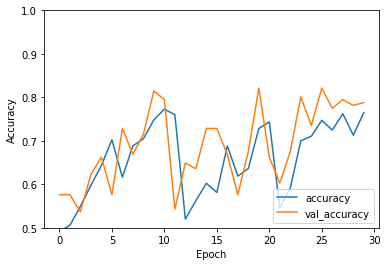

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [18]:
print(test_acc)

0.7401130199432373


In [19]:
y_test[0:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred[0:10]

array([[0.76781833],
       [0.31490287],
       [0.8110981 ],
       [0.3231595 ],
       [0.7803874 ],
       [0.5064431 ],
       [0.95584935],
       [0.6418838 ],
       [0.8652967 ],
       [0.9409517 ]], dtype=float32)